In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Load the data
out_path = ('/mnt/d/retraining_BirdNET_2025/model_train/general/')
df_path = ('/mnt/d/retraining_BirdNET_2025/model_train/train_set_4_strong-negatives_added-clips/summary_ARU_training_set.csv')
df = pd.read_csv(df_path)

In [39]:
# 1. Get all owl classes
owl_classes = df[df['class'].str.contains('Owl')]['class'].unique()

In [40]:
# 2. Get all iterations
iterations = sorted(df['iteration'].dropna().unique().astype(int))

In [41]:
# 3. Create full index of all combinations
full_index = pd.MultiIndex.from_product(
    [owl_classes, iterations],
    names=['class', 'iteration']
)

In [42]:
# Filter for owl classes
owl_df = df[df['class'].str.contains('Owl')].copy()
owl_df.head()

,iteration,class,ARU_clip_count
0,0,Aegolius harrisii_Buff-fronted Owl,0
3,0,Asio clamator_Striped Owl_call,19
4,0,Asio clamator_Striped Owl_song,0
5,0,Asio stygius_Stygian Owl_call,0
6,0,Asio stygius_Stygian Owl_song,0


In [43]:
# Ensure iteration is an integer
owl_df['iteration'] = owl_df['iteration'].astype(int)

In [44]:
# 5. Set index and reindex to fill missing values with 0
owl_df = owl_df.set_index(['class', 'iteration'])
owl_df = owl_df.reindex(full_index, fill_value=0).reset_index()

In [45]:
# 6. Compute cumulative sum per class
owl_df['cumulative'] = owl_df.groupby('class')['ARU_clip_count'].cumsum()

In [46]:
owl_df.head()

,class,iteration,ARU_clip_count,cumulative
0,Aegolius harrisii_Buff-fronted Owl,0,0,0
1,Aegolius harrisii_Buff-fronted Owl,1,7,7
2,Aegolius harrisii_Buff-fronted Owl,2,13,20
3,Aegolius harrisii_Buff-fronted Owl,3,0,20
4,Aegolius harrisii_Buff-fronted Owl,4,26,46


### Let's plot the clip cumulative curve per class and ieration

In [47]:
# I will create a dict to change the labels of the owls from the column classes
labels = {
    'Aegolius harrisii_Buff-fronted Owl': 'Buff-fronted Owl',
    'Asio clamator_Striped Owl_call': 'Striped Owl_call',
    'Asio clamator_Striped Owl_song': 'Striped Owl_song',
    'Asio stygius_Stygian Owl_call': 'Stygian Owl_call',
    'Asio stygius_Stygian Owl_song': 'Stygian Owl_song',
    'Athene cunicularia_Burrowing Owl_call': 'Burrowing Owl_call',
    'Athene cunicularia_Burrowing Owl_song': 'Burrowing Owl_song',
    'Ciccaba huhula_Black-banded Owl': 'Black-banded Owl',
    'Ciccaba virgata_Mottled Owl_call': 'Mottled Owl_call',
    'Ciccaba virgata_Mottled Owl_song': 'Mottled Owl_song',
    'Glaucidium brasilianum_Ferruginous Pygmy-Owl': 'Ferruginous Pygmy-Owl',
    'Megascops atricapilla_Black-capped Screech-Owl': 'Black-capped Screech-Owl',
    'Megascops choliba_Tropical Screech-Owl': 'Tropical Screech-Owl',
    'Megascops sanctaecatarinae_Long-tufted Screech-Owl': 'Long-tufted Screech-Owl',
    'Pulsatrix koeniswaldiana_Tawny-browed Owl': 'Tawny-browed Owl',
    'Strix hylophila_Rusty-barred Owl_call': 'Rusty-barred Owl_call',
    'Strix hylophila_Rusty-barred Owl_call1': 'Rusty-barred Owl_call1',
    'Strix hylophila_Rusty-barred Owl_song': 'Rusty-barred Owl_song',
    'Tyto alba_Barn Owl': 'Barn Owl'
    
}

In [48]:
# I will create a dict to manually set the color for each owl

color = {
    'Buff-fronted Owl': 'firebrick',
    'Striped Owl_call': 'darkgoldenrod',
    'Striped Owl_song': 'goldenrod',
    'Stygian Owl_call': 'olivedrab',
    'Stygian Owl_song': 'yellowgreen',
    'Burrowing Owl_call':'turquoise',
    'Burrowing Owl_song': 'lightseagreen',
    'Black-banded Owl': 'darkorange',
    'Mottled Owl_call': 'plum',
    'Mottled Owl_song': 'violet',
    'Ferruginous Pygmy-Owl': 'mediumslateblue',
    'Black-capped Screech-Owl': 'limegreen',
    'Tropical Screech-Owl': 'forestgreen',
    'Long-tufted Screech-Owl': 'olive',
    'Tawny-browed Owl': 'cornflowerblue',
    'Rusty-barred Owl_call': 'mediumvioletred',
    'Rusty-barred Owl_call1': 'deeppink',
    'Rusty-barred Owl_song': 'hotpink',
    'Barn Owl': 'teal'
}
    

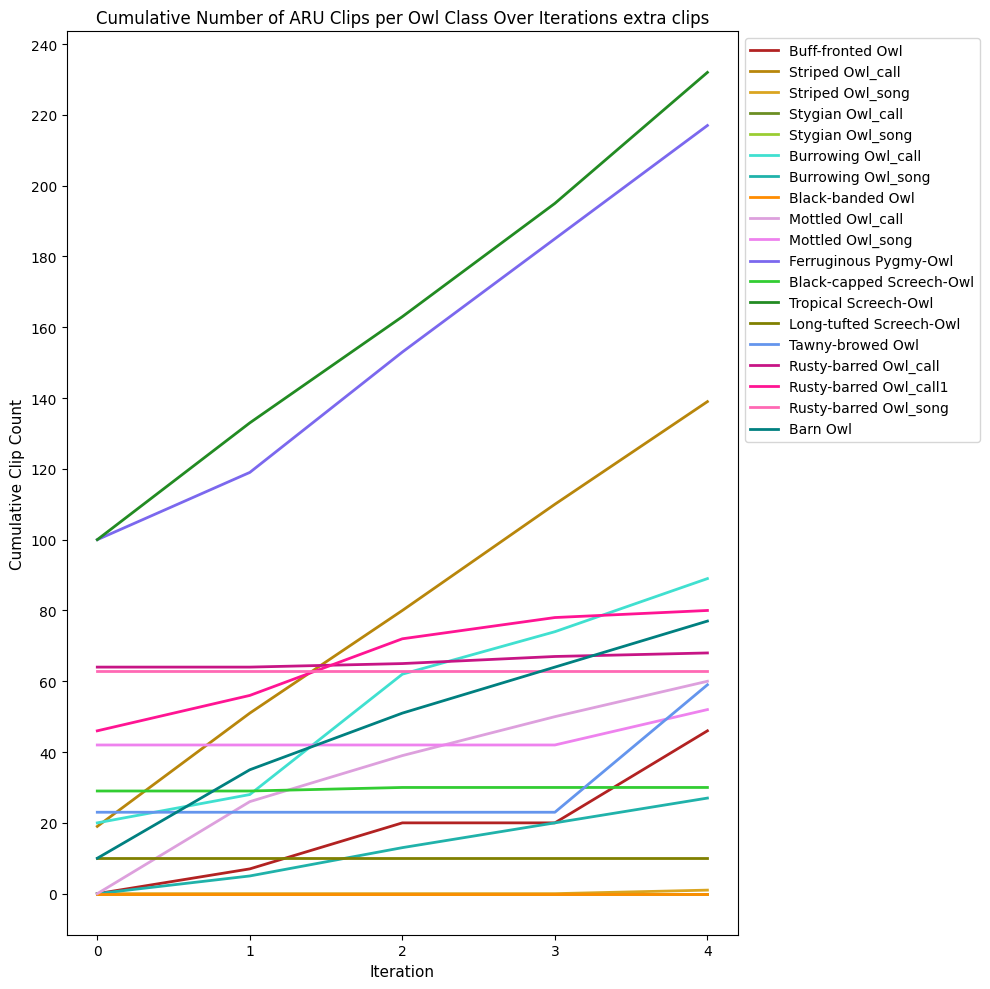

In [49]:
# Step 1: Set up the plot
plt.figure(figsize=(10, 10))

# Step 2: Plot a line for each owl class
for class_name in owl_df['class'].unique():
    class_data = owl_df[owl_df['class'] == class_name]
    short_label = labels[class_name]  # convert full to short label
    line_color = color.get(short_label, 'gray')  # fallback color if not found
    plt.plot(
        class_data['iteration'],
        class_data['cumulative'],
        label=short_label,
        color=line_color,
        linewidth=2
    )

    
# Step 3: Add labels, title, legend
plt.xlabel('Iteration', fontsize=11)
plt.ylabel('Cumulative Clip Count', fontsize=11)
plt.xticks(ticks= range (0, 5, 1))
plt.yticks(ticks=range(0, 260, 20))
plt.title('Cumulative Number of ARU Clips per Owl Class Over Iterations extra clips', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)  # Legend outside
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust layout to fit legend


# Step 4: save the plot

# Save BEFORE showing
output_dir = os.path.dirname(out_path)
plot_path = os.path.join(output_dir, "Cumulative ARU owl clips per iteration_extra-clips.png")
plt.savefig(plot_path, dpi=300)

# Step 5: Show the plot
plt.show()

#### Logic of plotting explained

owl_df['class'].unique() generates a list of unique class names in the DataFrame.
For example:
['Barn Owl', 'Mottled Owl_call', 'Mottled Owl_song', 'Stygian Owl', ...]

The for loop then iterates once per class name.

Inside the loop, class_data = owl_df[owl_df['class'] == class_name] filters the DataFrame and gives me only the rows for that one class.

Then it uses plt.plot() to draw the curve:
plt.plot(class_data['iteration'], class_data['cumulative'], label=class_name)
So it's plotting the cumulative clips for each class across iterations.